<h2><center>Investigating Netflix Movies</h2></center>  


*About the problem*
> Your friend suspects that movies are getting shorter and they've found some initial evidence of this.

*Objective of this challenge*
> Perform Exploratory Data Analysis on the netflix_data.csv data to understand what may be contributing to movies getting shorter over time. 


## Table of contents:

1. [Installing and importing libraries](#Libraries)
2. [Loading and previewing data](#Loading)
3. [Statistical Summaries](#Statistical)
4. [Investigate the Netflix movie data](#Investigate)

<a name="Libraries"></a>
## 1. Installing and importing Libraries

In [76]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a name="Loading"></a>
## 2. Loading and previewing data

In [8]:
# Load files
netflix_df = pd.read_csv("netflix_data.csv")

# Preview data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [19]:
# Check size and shape of the dataset
netflix_df.shape


(7787, 11)

<a name="Statistical"></a>
## 3. Statistical Summaries

In [21]:
netflix_df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7787.000000,7787,7787
unique,7787,2,7787,4049,6831,81,1565,NaN,NaN,7769,35
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,NaN,Multiple women report their husbands as missin...,Dramas
freq,1,5377,1,18,18,2883,118,NaN,NaN,3,1384
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,69.122769,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,50.950743,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,88.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,106.000000,NaN,NaN


In [22]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


<a name="Investigate"></a>
## 4. Investigate the Netflix movie data

In [13]:
# Filter out TV shows
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]


In [17]:
# Keep the relevant data
netflix_movies = netflix_subset.loc[:, ["title", "country", "genre", "release_year", "duration"]]


In [24]:
# Find movies that are shorter than 60 minutes
short_movies = netflix_movies[netflix_movies["duration"] < 60]

short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [33]:
# Inspect the results
country_counts = short_movies["country"].value_counts()
country_counts

United States     219
United Kingdom     45
Canada             22
Mexico             12
Japan               9
India               8
France              7
Germany             3
Australia           3
Brazil              3
Ireland             2
Spain               2
Netherlands         2
Italy               2
Argentina           2
Georgia             1
South Africa        1
Pakistan            1
Colombia            1
Israel              1
Sweden              1
Iceland             1
Denmark             1
Poland              1
Norway              1
Czech Republic      1
Namibia             1
South Korea         1
Name: country, dtype: int64

In [30]:
genre_counts = short_movies["genre"].value_counts()
genre_counts

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64

In [31]:
release_year_counts = short_movies["release_year"].value_counts()
release_year_counts

2020    68
2017    64
2019    63
2018    55
2016    38
2013    22
2015    21
2014    17
2011    11
2012    11
2010     9
2008     8
1991     3
2021     3
1944     2
2004     2
1942     2
1945     2
1998     2
2006     2
2009     2
2003     1
1946     1
2000     1
2001     1
2005     1
1988     1
1993     1
1987     1
1978     1
1994     1
1947     1
1990     1
1943     1
Name: release_year, dtype: int64

In [69]:
# Calculate and print the Pearson correlation coefficient for release_year and duration
correlation = netflix_movies['release_year'].corr(netflix_movies['duration'])

correlation

-0.20489067800320107

The Pearson correlation coefficient is approximately -0.205, indicating a slight negative linear relationship between movie duration and release year. This suggests that, on average, movies have been getting shorter as time progresses. 

In [57]:
# Iterate over the netflix_movies rows and assign a colour to the genres
colours = []

for label, row in netflix_movies.iterrows():
    if row["genre"] == "Documentaries":
        colours.append("red")
    elif row["genre"] == "Children":
        colours.append("blue")
    elif row["genre"] == "Stand-Up":
        colours.append("orange")
    else:  # For the other genres
        colours.append("purple")
        

# Inspect the first 10 values in your list        
colours[:10]

['purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'red']

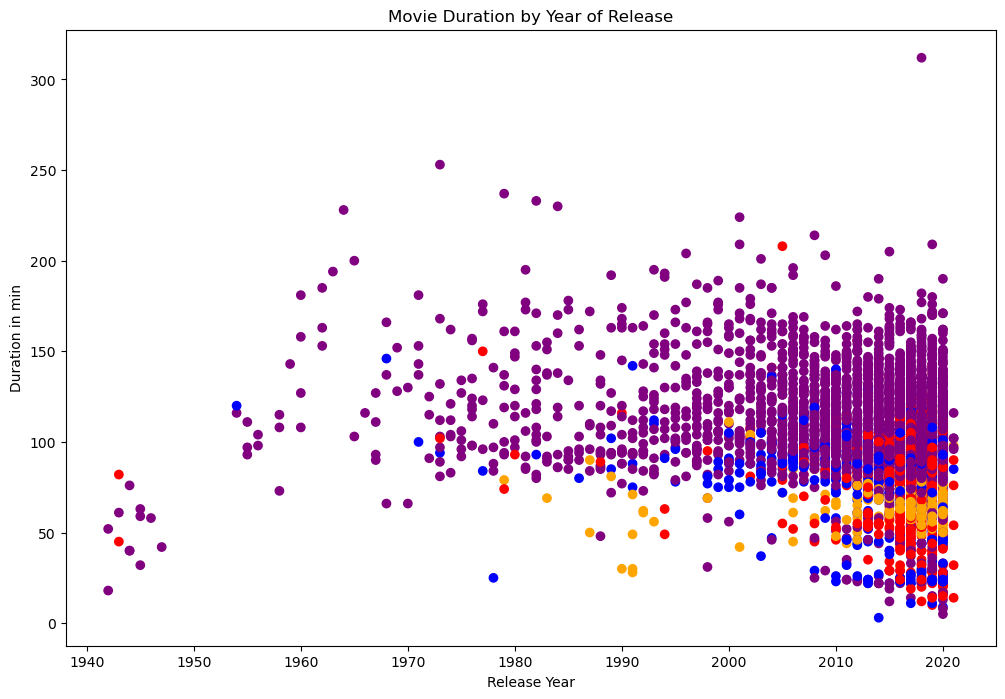

In [75]:
# Create a scatter plot for movie duration by release year
plt.figure(figsize=(12,8))
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colours)

# Set the title and labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Duration in min")
plt.show()

From the plot, we can observe several points:
- Data Distribution: The data points are more densely packed in recent years, suggesting an increase in the number of movies being produced 
